In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [264]:
nifty=pd.read_csv(r'C:\Users\darvin.l\Downloads\^NSEI.csv')

In [265]:
nifty=nifty.dropna()

In [266]:
nifty.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1229,2021-01-14,14550.049805,14617.799805,14471.500000,14595.599609,14595.599609,620200.0
1230,2021-01-15,14594.349609,14617.450195,14357.849609,14433.700195,14433.700195,789600.0
1231,2021-01-18,14453.299805,14459.150391,14222.799805,14281.299805,14281.299805,762000.0
1232,2021-01-19,14371.650391,14546.049805,14350.849609,14521.150391,14521.150391,546100.0
1233,2021-01-20,14538.299805,14666.450195,14517.549805,14644.700195,14644.700195,623100.0


In [267]:
nifty1=nifty.reset_index()['Close']

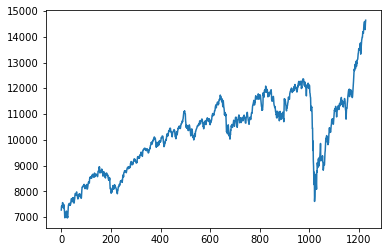

In [268]:
plt.plot(nifty1)

In [269]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [270]:
nifty1=scaler.fit_transform(np.array(nifty1).reshape(-1,1))

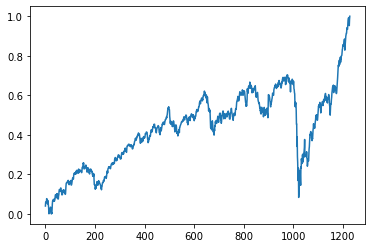

In [271]:
plt.plot(nifty1)

In [272]:
training_size=int(len(nifty1)*0.80)
test_size=len(nifty1)-training_size
train_data,test_data=nifty1[0:training_size,:],nifty1[training_size:len(nifty1),:1]

In [273]:
training_size,test_size

(982, 246)

In [274]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [275]:
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [276]:
X_train.shape,y_train.shape

((931, 50), (931,))

In [277]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [278]:
X_train.shape,y_train.shape

((931, 50, 1), (931,))

In [279]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout

In [280]:
model=Sequential()
model.add(LSTM(25,return_sequences=True,input_shape=(50,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [281]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 50, 25)            2700      
_________________________________________________________________
lstm_19 (LSTM)               (None, 50, 50)            15200     
_________________________________________________________________
lstm_20 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 38,151
Trainable params: 38,151
Non-trainable params: 0
_________________________________________________________________


In [282]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=25,batch_size=64,verbose=1)

Epoch 1/25
15/15 [==============================] - 7s 482ms/step - loss: 0.0397 - val_loss: 0.0385
Epoch 2/25
15/15 [==============================] - 4s 253ms/step - loss: 0.0058 - val_loss: 0.0061
Epoch 3/25
15/15 [==============================] - 4s 251ms/step - loss: 0.0022 - val_loss: 0.0047
Epoch 4/25
15/15 [==============================] - 4s 246ms/step - loss: 0.0013 - val_loss: 0.0046
Epoch 5/25
15/15 [==============================] - 4s 253ms/step - loss: 9.2249e-04 - val_loss: 0.0040
Epoch 6/25
15/15 [==============================] - 4s 249ms/step - loss: 9.1043e-04 - val_loss: 0.0036
Epoch 7/25
15/15 [==============================] - 4s 250ms/step - loss: 9.0726e-04 - val_loss: 0.0052
Epoch 8/25
15/15 [==============================] - 4s 267ms/step - loss: 8.9845e-04 - val_loss: 0.0051
Epoch 9/25
15/15 [==============================] - 4s 253ms/step - loss: 8.9067e-04 - val_loss: 0.0034
Epoch 10/25
15/15 [==============================] - 4s 266ms/step - loss: 9.386

In [283]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [284]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

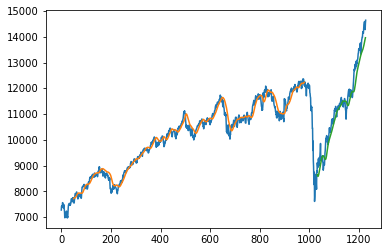

In [285]:
look_back=50
trainPredictPlot = np.empty_like(nifty1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(nifty1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(nifty1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(nifty1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [288]:
x_input=test_data[146:].reshape(1,-1)
x_input.shape

(1, 100)

In [289]:
len(test_data)

246

In [290]:
temp_input=list(x_input)


In [291]:
temp_input=temp_input[0].tolist()

In [292]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

[0.9217676]
101
1 day input [0.6094525  0.57555933 0.58634235 0.59477982 0.59379602 0.56856823
 0.57133079 0.56641814 0.56129055 0.58360588 0.58558659 0.58240701
 0.59305973 0.60384275 0.59231694 0.59086408 0.55771356 0.54508675
 0.54224593 0.49972631 0.53161281 0.55471647 0.55404546 0.55732264
 0.57939694 0.59065551 0.61138117 0.62134315 0.63382018 0.64419281
 0.64637548 0.64683804 0.65160079 0.6137201  0.6244185  0.63883057
 0.64192539 0.64724857 0.64187983 0.64629721 0.62510911 0.64096119
 0.62013779 0.61247568 0.608775   0.61226075 0.63107072 0.64345003
 0.67104933 0.68971601 0.71545193 0.73761085 0.75299387 0.74539029
 0.74918883 0.76928891 0.77763514 0.75593229 0.76731469 0.77609753
 0.79286825 0.76723006 0.78398768 0.78163563 0.7998918  0.80050427
 0.80313004 0.81937291 0.83203891 0.83688641 0.85462783 0.84800819
 0.85264063 0.85841339 0.85967728 0.87464328 0.88220117 0.88478774
 0.82847503 0.84644449 0.86401004 0.88331528 0.89946704 0.90720728
 0.91363808 0.913612   0.93330817 

7 day output [[0.92291313]]
8 day input [0.56641814 0.56129055 0.58360588 0.58558659 0.58240701 0.59305973
 0.60384275 0.59231694 0.59086408 0.55771356 0.54508675 0.54224593
 0.49972631 0.53161281 0.55471647 0.55404546 0.55732264 0.57939694
 0.59065551 0.61138117 0.62134315 0.63382018 0.64419281 0.64637548
 0.64683804 0.65160079 0.6137201  0.6244185  0.63883057 0.64192539
 0.64724857 0.64187983 0.64629721 0.62510911 0.64096119 0.62013779
 0.61247568 0.608775   0.61226075 0.63107072 0.64345003 0.67104933
 0.68971601 0.71545193 0.73761085 0.75299387 0.74539029 0.74918883
 0.76928891 0.77763514 0.75593229 0.76731469 0.77609753 0.79286825
 0.76723006 0.78398768 0.78163563 0.7998918  0.80050427 0.80313004
 0.81937291 0.83203891 0.83688641 0.85462783 0.84800819 0.85264063
 0.85841339 0.85967728 0.87464328 0.88220117 0.88478774 0.82847503
 0.84644449 0.86401004 0.88331528 0.89946704 0.90720728 0.91363808
 0.913612   0.93330817 0.94198666 0.93504773 0.93388794 0.96123973
 0.97915714 0.98941244

In [293]:
len(lst_output)

10

In [294]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

In [295]:
len(nifty1)

1228

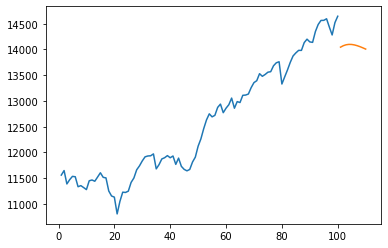

In [296]:
plt.plot(day_new,scaler.inverse_transform(nifty1[1128:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [299]:
next_10=scaler.inverse_transform(lst_output)

In [300]:
next_10

array([[14044.33686848],
       [14072.74123949],
       [14090.59540249],
       [14098.0987891 ],
       [14096.4607967 ],
       [14087.31347131],
       [14072.35381152],
       [14053.1278699 ],
       [14030.94658929],
       [14006.8542413 ]])

In [201]:
max(nifty['Date'])

'2021-01-20'